In [148]:
import numpy as np
import pandas as pd
import xlrd

import matplotlib.pyplot as plt
from numpy.fft import fft, fftfreq, ifft, rfft

fs = 114 * 1000 #114KHZ
def fft_from_data_frame(data_frame):
    signal_set = []
    for row in data_frame.values:
        fft_data = fft(row, n=row.size)/row.size
        freq = fftfreq(row.size, d=1/fs)
        cut_high_signal = np.abs(fft_data).copy()
        cut_high_signal[(freq > 45000)] = 0
        cut_high_signal[(freq < 30000)] = 0
        signal_without_0 = list(filter(lambda a: a != 0, cut_high_signal))
        signal_set.append(signal_without_0)
    return signal_set

def for_fft_plot(data_frame):
    fs = 114*1000
    signal_set = []
    for row in data_frame.values:
        fft_data = fft(row, n=row.size)/row.size
        freq = fftfreq(row.size, d=1/fs)
        cut_high_signal = np.abs(fft_data).copy()
        cut_high_signal[(freq > 45000)] = 0
        cut_high_signal[(freq < 30000)] = 0
        signal_without_0 = list(filter(lambda a: a != 0, cut_high_signal))
        signal_set.append(fft_data)
    return signal_set

In [343]:
# car_front = pd.read_csv('./Documents/data_set/Result/67_Ford_Black_front/80_overall.csv')
# car_side = pd.read_csv('./Documents/data_set/Result/99_Fiesta_Purple_side/80_overall.csv')
# car_back = pd.read_csv('./Documents/data_set/Result/26_Ford_Black_back/80_overall.csv')
# pillar = pd.read_csv('./Documents/data_set/Result/Pillar/80_overall.csv')
# human_A = pd.read_csv('./Documents/data_set/Result/Human_A/80_overall.csv')
# human_B = pd.read_csv('./Documents/data_set/Result/Human_B/80_overall.csv')

# car_front_fft = fft_from_data_frame(car_front)
# car_side_fft = fft_from_data_frame(car_side)
# car_back_fft = fft_from_data_frame(car_back)
# pillar_fft = fft_from_data_frame(pillar)
# human_A_fft = fft_from_data_frame(human_A)
# human_B_fft = fft_from_data_frame(human_B)

In [149]:
import glob

def get_fft_set(file_names):
    fft_set = []
    for front in file_names:
        data = pd.read_csv(front)
        fft_data = fft_from_data_frame(data)
        fft_set = fft_data + fft_set
    return fft_set

car_front = glob.glob('./final_data/Result/Result/67_Ford_Black_front/*_overall.csv')
car_side = glob.glob('./final_data/Result/Result/99_Fiesta_Purple_side/*_overall.csv')
car_back = glob.glob('./final_data/Result/Result/26_Ford_Black_back/*_overall.csv')
pillar = glob.glob('./final_data/Result/Result/Pillar/*_overall.csv')
human_A = glob.glob('./final_data/Result/Result/Human_A/*_overall.csv')
human_B = glob.glob('./final_data/Result/Result/Human_B/*_overall.csv')

car_front_fft = get_fft_set(car_front)
car_side_fft = get_fft_set(car_side)
car_back_fft = get_fft_set(car_back)
pillar_fft = get_fft_set(pillar)
human_A_fft = get_fft_set(human_A)
human_B_fft = get_fft_set(human_B)


In [155]:
car = car_front_fft + car_side_fft + car_back_fft
human = human_A_fft + human_B_fft
X = car + pillar_fft + human
y = len(car)*['Car'] + len(pillar_fft)*['Pillar'] + len(human)*['Human']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
normalized_X_train = preprocessing.normalize(X_train)
normalized_X_test = preprocessing.normalize(X_test)

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(36,), random_state=5,activation="relu")
clf.fit(normalized_X_train,y_train)
y_predict = clf.predict(normalized_X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_predict, y_test)

0.8636363636363636

0.8636363636363636

In [153]:
from sklearn.model_selection import cross_val_score

for i in range(19,50):
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(i), random_state=5)
    scores = cross_val_score(clf, normalized_X_train, y_train, cv=4, scoring="accuracy")
    print("hidden layer", i, "score average", scores.mean())

hidden layer 19 score average 0.8045093358960418
hidden layer 20 score average 0.7858704326645756
hidden layer 21 score average 0.7939915829430505
hidden layer 22 score average 0.813401958584199
hidden layer 23 score average 0.8186581469878326
hidden layer 24 score average 0.8221922534831279
hidden layer 25 score average 0.7843407589047743
hidden layer 26 score average 0.8292718307507994
hidden layer 27 score average 0.8139727207053553
hidden layer 28 score average 0.7986761693565447
hidden layer 29 score average 0.8439899432454474
hidden layer 30 score average 0.7976224612637113
hidden layer 31 score average 0.8390226815716045
hidden layer 32 score average 0.8254500788173296
hidden layer 33 score average 0.8356752126312161
hidden layer 34 score average 0.857372511389101
hidden layer 35 score average 0.815598689972377
hidden layer 36 score average 0.8610076296542633
hidden layer 37 score average 0.8467656636233619
hidden layer 38 score average 0.8145491857262038
hidden layer 39 score a

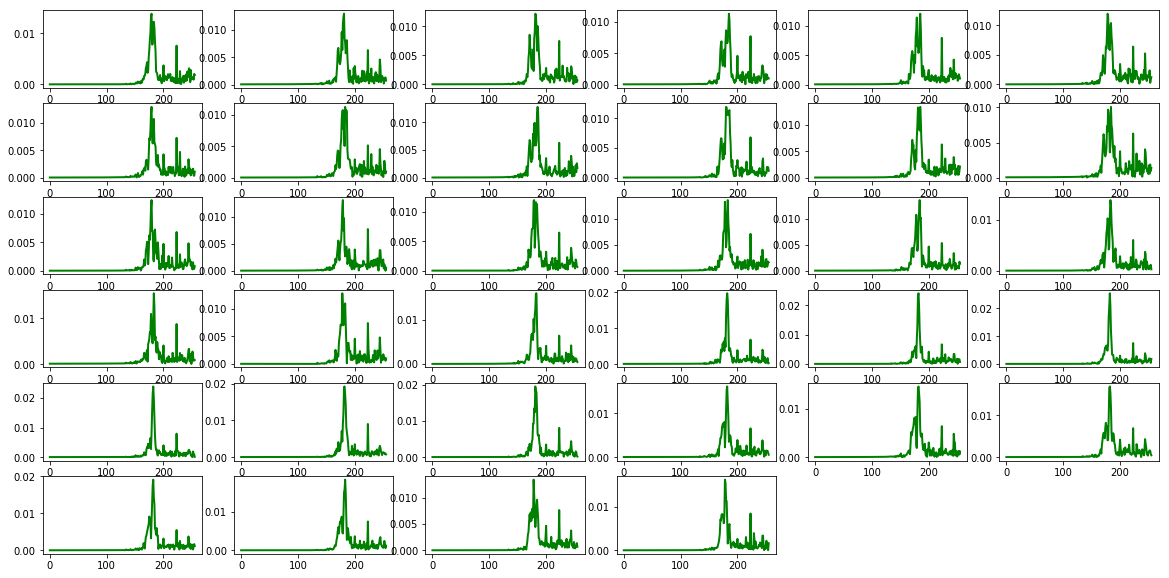

In [37]:
i= 1
fig = plt.figure(figsize=(20,10))
for index, data in enumerate(human_A_fft):
    if i < 35:
        ax = fig.add_subplot(6,6,i)
        i=i+1
        #ax.plot(data, 'b-', label='data')
        ax.plot(data, 'g-', linewidth=2, label='filtered data')

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

def create_confusion_matrix(result, y_test, labels):
    cm = confusion_matrix(result, y_test)
    score = accuracy_score(result, y_test)
    import seaborn as sns
    import matplotlib.pyplot as plt     
    sum = np.sum(cm, axis=1)
 
    from sklearn.metrics import precision_score, recall_score
    precision_CLASS_A = round(precision_score(y_test, result, average='binary',pos_label=labels[0]),2)
    precision_CLASS_B = round(precision_score(y_test, result, average='binary',pos_label=labels[1]),2)
    recall_CLASS_A = round(recall_score(y_test, result, average='binary',pos_label=labels[0]),2)
    recall_CLASS_B = round(recall_score(y_test, result, average='binary',pos_label=labels[1]),2)
    print(precision_CLASS_A, precision_CLASS_B,recall_CLASS_A,recall_CLASS_B)
    cm_new = np.append(cm[0], precision_CLASS_A)
    cm_new2 = np.append(cm[1], precision_CLASS_B)
    cm_new3 = np.array([recall_CLASS_A, recall_CLASS_B, score])
    cm = np.array([cm_new,cm_new2,cm_new3])
    print(precision_CLASS_A, precision_CLASS_B)


    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(cm, annot=True, ax = ax,linewidths=.5,fmt='g',cmap="Reds"); #annot=True to annotate cells

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');
    ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    counter = 0
    for i in range(0,2):
        for j in range(0,2):
            percentage = cm[i][j]/sum[i]
            if (counter+1)/3 == 1:
                counter += 1
            t = ax.texts[counter]
            t.set_text(str(cm[i][j]) + '\n' + str(round(percentage*100,2)) + " %")
            counter = counter + 1

    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels);

0.78 0.95 0.69 0.97
0.78 0.95
[[ 673  186]
 [ 309 5806]]


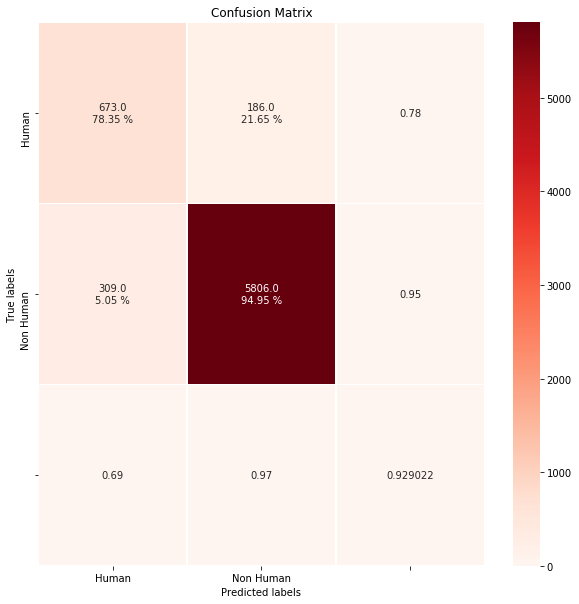

In [156]:
from sklearn.metrics import confusion_matrix
car = car_front_fft + car_side_fft + car_back_fft
human = human_A_fft + human_B_fft
X = car + pillar_fft + human
y = len(car)*['Non Human'] + len(pillar_fft)*['Non Human'] + len(human)*['Human']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
normalized_X_train = preprocessing.normalize(X_train)
normalized_X_test = preprocessing.normalize(X_test)

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(36,), random_state=5,activation="relu")
clf.fit(normalized_X_train,y_train)
y_predict = clf.predict(normalized_X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_predict, y_test)
labels = ['Human', 'Non Human']
create_confusion_matrix(y_predict, y_test, labels)
print(confusion_matrix(y_predict, y_test, labels))

In [157]:
len(human) * 0.4


1019.2

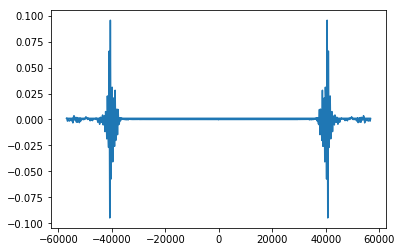

In [146]:
fs= 114*1000
human_B = glob.glob('./final_data/Result/Result/Pillar/*_overall.csv')
def get_fft_set2(file_names):
    fft_set = []
    for front in file_names:
        data = pd.read_csv(front)
        fft_data = for_fft_plot(data)
        fft_set = fft_data + fft_set
    return fft_set
human_B_fft_test = get_fft_set2(human_B)
fft_data = human_B_fft_test[0]
freq = fftfreq(len(fft_data), d=1/fs)
plt.plot(freq, human_B_fft_test[0])

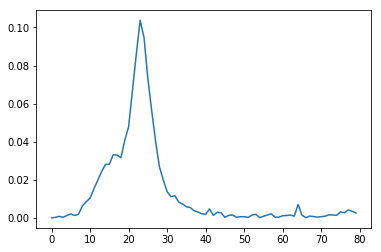

In [144]:
fs= 114*1000
human_B = glob.glob('./final_data/Result/Result/Pillar/*_overall.csv')
def get_fft_set2(file_names):
    fft_set = []
    for front in file_names:
        data = pd.read_csv(front)
        fft_data = fft_from_data_frame(data)
        fft_set = fft_data + fft_set
    return fft_set
human_B_fft_test = get_fft_set2(human_B)
fft_data = human_B_fft_test[0]
freq = fftfreq(len(fft_data), d=1/fs)

plt.plot(human_B_fft_test[0])

In [166]:
from collections import Counter

print(Counter(y_predict).keys(), Counter(y_predict).values())
print(Counter(y_test).keys(), Counter(y_test).values())

dict_keys(['Human', 'Non Human']) dict_values([859, 6115])
dict_keys(['Non Human', 'Human']) dict_values([5992, 982])


dict_values([859, 6115])